# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Aggregate Data with Loops

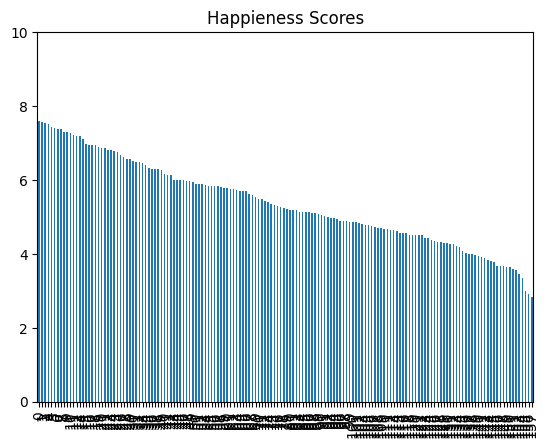

In [5]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happieness Scores', ylim=(0,10))
plt.show()

In [7]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [8]:
so_asia = happiness2015[happiness2015["Region"] == "Southern Asia"]

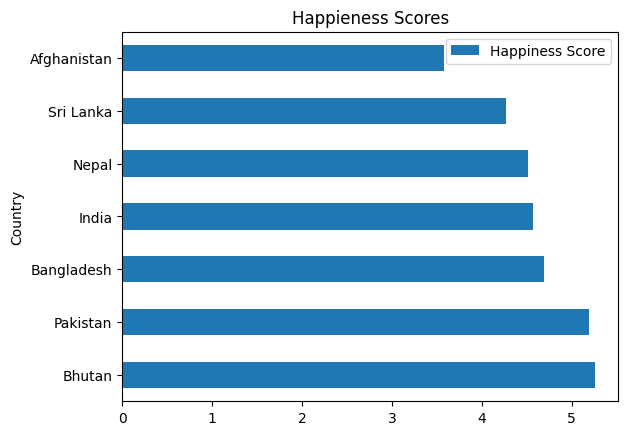

In [13]:
so_asia.plot(kind='barh', x="Country", y='Happiness Score', title='Happieness Scores', ylim=(0,10))
plt.show()

In [16]:
mean_happiness = {}

for region in happiness2015['Region'].unique():
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == region]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[region] = region_mean

print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.1446818181818195, 'Southeastern Asia': 5.317444444444444, 'Central and Eastern Europe': 5.332931034482757, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.2028, 'Southern Asia': 4.580857142857143}


### GroupBy Operation

In [17]:
happiness2015.groupby("Region")

In [20]:
# happiness2015.groupby("Region").get_group("Southern Asia")

In [21]:
happiness2015.groupby("Region").groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

In [22]:
happiness2015.groupby("Region").size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [24]:
happiness2015.groupby("Region").mean(numeric_only=True)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [26]:
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

#### Agg() Method

In [27]:
import numpy as np

In [29]:
def diff(group):
    return (group.max() - group.mean())

In [30]:
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.max, diff])

,mean,amax,diff
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


### Pivot Tables

<img src="./images/PV_Syntax.svg">

In [31]:
happiness2015.pivot_table(index="Region", values="Happiness Score", aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


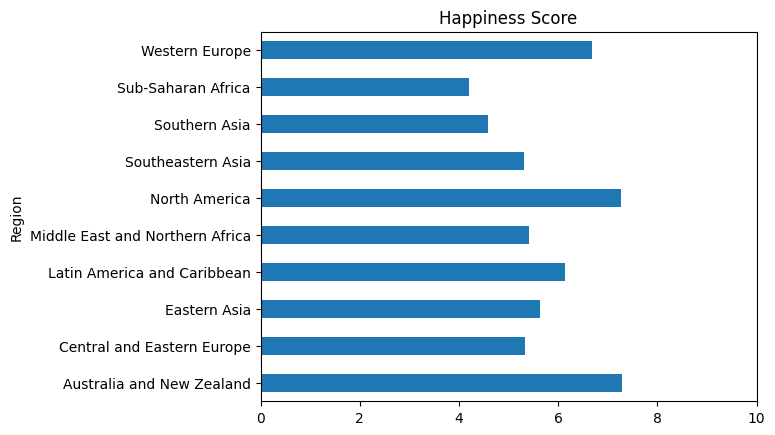

In [35]:
happiness2015.pivot_table(index="Region", values="Happiness Score", aggfunc=np.mean).plot(
    kind="barh", title="Happiness Score", xlim=(0,10), legend=False
)
plt.show()

## Pandas DataFrame all() Method

In [37]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [38]:
happiness2015["Region"].all()

True

## Combining Data

In [39]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [40]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [41]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [81]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [48]:
subjects = ['Year','Country','Happiness Score']

In [73]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(3).set_index("Country")
head_2016 = happiness2016[['Year','Country','Happiness Score']].head().set_index("Country")

In [74]:
head_2015

,Year,Happiness Score,Standard Error
Country,,,
Switzerland,2015,7.587,0.03411
Iceland,2015,7.561,0.04884
Denmark,2015,7.527,0.03328


In [75]:
head_2016

,Year,Happiness Score
Country,,
Denmark,2016,7.526
Switzerland,2016,7.509
Iceland,2016,7.501
Norway,2016,7.498
Finland,2016,7.413


In [76]:
pd.concat([head_2015, head_2016], axis=0)

,Year,Happiness Score,Standard Error
Country,,,
Switzerland,2015,7.587,0.03411
Iceland,2015,7.561,0.04884
Denmark,2015,7.527,0.03328
Denmark,2016,7.526,NaN
Switzerland,2016,7.509,NaN
Iceland,2016,7.501,NaN
Norway,2016,7.498,NaN
Finland,2016,7.413,NaN


In [77]:
pd.concat([head_2015, head_2016], axis=1)

,Year,Happiness Score,Standard Error,Year,Happiness Score
Country,,,,,
Switzerland,2015.0,7.587,0.03411,2016,7.509
Iceland,2015.0,7.561,0.04884,2016,7.501
Denmark,2015.0,7.527,0.03328,2016,7.526
Norway,NaN,NaN,NaN,2016,7.498
Finland,NaN,NaN,NaN,2016,7.413


In [78]:
pd.concat([head_2015, head_2016], axis=1, ignore_index=True)

,0,1,2,3,4
Country,,,,,
Switzerland,2015.0,7.587,0.03411,2016,7.509
Iceland,2015.0,7.561,0.04884,2016,7.501
Denmark,2015.0,7.527,0.03328,2016,7.526
Norway,NaN,NaN,NaN,2016,7.498
Finland,NaN,NaN,NaN,2016,7.413


<img src="./images/Concat_DifShapes.svg">

### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [82]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2017 = happiness2017[['Country','Happiness.Rank','Year']].iloc[2:5]

In [83]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [84]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [85]:
three_2017

,Country,Happiness.Rank,Year
2,Iceland,3,2017
3,Switzerland,4,2017
4,Finland,5,2017


In [102]:
first_two = pd.merge(left=three_2015, right=three_2016, on="Country", how="outer", suffixes=("_2015", "_2016"))
all_df = pd.merge(left=first_two, right=three_2017, how="outer", on="Country")
all_df.rename(columns={"Happiness.Rank": "Happiness Rank_2017"}, inplace=True)
all_df.drop(columns=["Year_2015", "Year_2016", "Year"], inplace=True)
all_df

,Country,Happiness Rank_2015,Happiness Rank_2016,Happiness Rank_2017
0,Denmark,3.0,NaN,NaN
1,Norway,4.0,4.0,NaN
2,Canada,5.0,NaN,NaN
3,Iceland,NaN,3.0,3.0
4,Finland,NaN,5.0,5.0
5,Switzerland,NaN,NaN,4.0


### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [108]:
happiness2017.rename(columns={"Happiness.Score": "Happiness Score"}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017],sort=True)
combined.head(2)

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015


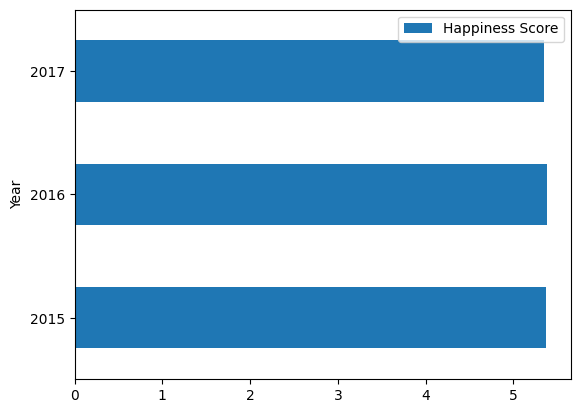

In [113]:
combined.pivot_table(values="Happiness Score", index="Year", aggfunc=np.mean).plot(kind="barh")
plt.show()

## Transforming Data

In [67]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [68]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [69]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

### Map and Apply Methods (Element-wise)

In [73]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

<img src="./images/Map.svg">

### Applymap Method (Element-wise to Multiple Columns)

### Apply Method (along an Axis)

<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

<img src="./images/Apply_counts.svg">

In [98]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']




In [101]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Melt Function

<img src="./images/Melt_Syntax.svg">

In [107]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Primer: Aggregate the Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

## Vaja

In [1]:
import pandas as pd
import json

json_data_path = "./data/honeypot.json"

In [2]:
import re

url_path_regex = re.compile(r"https?:\/\/.+?(\/.*)")

def extract_url_path(full_url: str) -> str:
        if full_url.startswith("/"):
            return full_url
        try:
            return url_path_regex.search(full_url).group(1)
        except AttributeError:
            return "/"